# Learning and Decision Making

## Laboratory 5: Reinforcement learning

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. The key world domain

Consider once again the gridworld domain from Lab 2 and which you modeled using a Markov decision process.

<img src="maze.png" width="200px">

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability. 

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$. 

* When the movement fails, the agent remains in the same cell. 

* To get a colored key, the agent simply needs to stand in the corresponding cell. 

* The goal of the agent is to reach the cell marked with **"G"**. 

Throughout the lab, use $\gamma=0.99$. As seen in Lab 2, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [1]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# States
X = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']

nX = len(X)

# Actions
A = ['U', 'D', 'L', 'R']

nA = len(A)

# Transition probabilities for the hare
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Cost function
             
c = np.array([[1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0],
              [0.0, 0.0, 0.0, 0.0],
              [1.0, 1.0, 1.0, 1.0],
              [1.0, 1.0, 1.0, 1.0]])

gamma = 0.99

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [2]:
def Q_value_iteration():
    MIN_ERR = 1e-8
    J = np.zeros((nX, 1))
    err = 1

    # Based on slide 62 of lec8.pdf:
    while err > MIN_ERR:
        Qs = [c[:, [i]] + gamma * P[i] @ J for i in range(nA)]
        Jnew = np.min(Qs, axis=0)
        err = np.linalg.norm(Jnew - J)
        J = Jnew
    Q = np.hstack(Qs)
    return Q

Q1 = Q_value_iteration()
print(Q1)

[[ 5.84607096  5.84607096  5.84607096  4.89502117]
 [11.57144785 10.67823015 11.57144785 12.45352816]
 [ 7.0200601   7.9475408   6.08086879  7.9475408 ]
 [ 4.65725873  3.69420073  5.60830851  3.69420073]
 [12.67404824 11.79196792 11.79196792 12.67404824]
 [ 8.17941097  9.09532707  7.25193028  8.17941097]
 [ 3.45343623  2.47821842  4.41649423  3.45343623]
 [11.34814342  9.55043002 10.45492572 11.34814342]
 [ 7.25193028  9.09532707  8.17941097  9.09532707]
 [ 4.41649423  4.41649423  3.45343623  2.47821842]
 [12.45352816 11.57144785 10.67823015 11.57144785]
 [ 8.40839     9.3243061   8.40839     9.3243061 ]
 [ 3.20963178  2.23441397  3.20963178  1.24688279]
 [ 0.          0.          0.98753117  0.        ]
 [ 8.40839     9.3243061   9.3243061   9.3243061 ]
 [ 3.69420073  4.65725873  4.65725873  4.65725873]]


---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $x$, selects a random action using the $\epsilon$-greedy policy obtained from $Q$ for state $x$. Your function should receive an optional parameter, corresponding to $\epsilon$, with default value of 0.1. 

**Note:** In the case of two actions with the same value, your $\epsilon$-greedy policy should randomize between the two.

---

In [3]:
def epsilon_greedy(Q, x, epsilon=0.1):
    if np.random.choice([0, 1], p=[epsilon, 1-epsilon]):
        return np.random.choice(np.where(Q[x] == np.min(Q[x]))[0])
    else:
        return np.random.choice(nA)

def test():
    X = 3
    N_TESTS = 50
    print("Always exploit:")
    for i in range(N_TESTS):
        print(epsilon_greedy(Q1, X, 0), end = " ")
    print("\n50%/50%:")
    for i in range(N_TESTS):
        print(epsilon_greedy(Q1, X, 0.5), end = " ")
    print("\nAlways explore:")
    for i in range(N_TESTS):
        print(epsilon_greedy(Q1, X, 1), end = " ")

test()

Always exploit:
3 3 1 1 1 1 3 3 1 3 1 3 1 1 1 3 3 3 3 3 3 3 3 1 3 3 1 3 1 3 1 3 1 1 3 3 3 3 3 3 3 3 1 1 3 1 1 3 1 1 
50%/50%:
1 0 1 1 1 1 3 1 1 3 3 0 3 3 0 1 0 3 3 1 1 1 2 0 1 1 2 2 1 0 3 3 3 1 1 1 2 3 3 3 2 3 1 1 3 2 1 0 2 2 
Always explore:
1 2 0 2 2 2 1 3 1 3 1 1 1 1 2 0 1 0 2 3 3 2 3 1 3 2 1 0 2 1 0 3 3 2 1 0 1 3 3 3 0 0 3 3 0 2 1 0 0 2 

### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the cost function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* The state and action, you will then compute the cost and generate the next state; 
* With this transition information (state, action, cost, next-state), you can now perform an update. 
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the boat reaches the goal cell, make one further step, the corresponding update, and then reset the position of the vehicle to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

[[ 5.80758794  5.80599648  5.81412623  4.86876857]
 [11.51606194 10.60809552 11.51334965 12.4000484 ]
 [ 6.95575281  8.11664766  6.00872031  7.91424923]
 [ 4.60642919  3.70731452  5.70555854  3.64128764]
 [12.69503134 11.73097681 11.95423966 12.61764632]
 [ 7.91808234  7.5065496   7.12150817  7.25440094]
 [ 3.39411227  2.4159377   4.60315065  3.39184467]
 [11.39293128  9.51649439 10.41911719 11.15188331]
 [ 7.18696745  9.05007869  8.10882401  9.2420295 ]
 [ 4.20150868  3.54396614  3.63534816  2.56635281]
 [12.37582066 11.49145442 10.59243072 11.47610811]
 [ 8.31194934  9.15639266  8.46114931  9.08370065]
 [ 3.2684215   2.24833491  3.06873894  1.24632568]
 [ 0.          0.          0.83138978  0.        ]
 [ 8.37746479  9.2707046   9.29442768  9.28746411]
 [ 2.56090825  2.9701      2.9701      3.293533  ]]


<IPython.core.display.Javascript object>


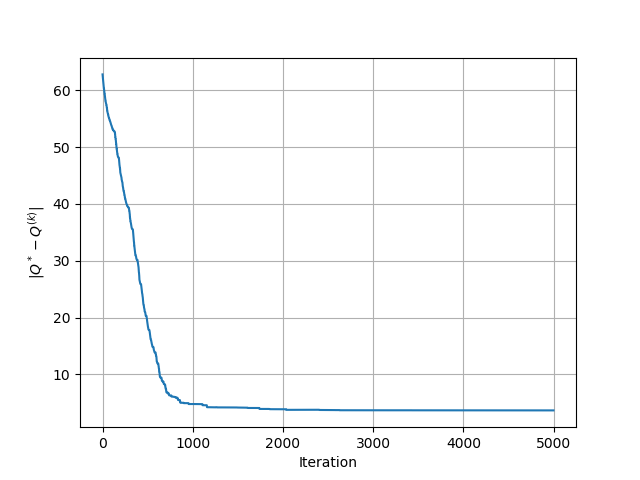

In [4]:
N_ITERATIONS = 5000
GOAL = 13

P3 = [np.eye(nX) for a in range(nA)]
c3 = np.zeros((nX, nA))
Q3 = np.zeros((nX, nA))
N3 = np.zeros((nX, nA))

def P_t1(y, x_t, a_t, x_t1, alpha):
    P3[a_t][x_t, y] = P3[a_t][x_t, y] + alpha * (int(x_t1 == y) - P3[a_t][x_t, y])
    
    # Doesn't seem to be necessary for np.random.choice
    # Also some lines get zeroed out? Would that mean a uniform distribution?
    #s = np.sum(P3[a_t][x_t])
    #if s != 0:
    #    P3[a_t][x_t] /= s
    
    return P3[a_t][x_t, y]

def c_t1(x_t, a_t, c_t, alpha):
    c3[x_t, a_t] = c3[x_t, a_t] + alpha * (c_t - c3[x_t, a_t])
    return c3[x_t, a_t]

def step_size(x_t, a_t):
    return 1/(N3[x_t, a_t] + 1)

# Slide 4 of lec21.pdf
def Q_t1(x_t, a_t, c_t, x_t1):
    alpha = step_size(x_t, a_t)
    result = c_t1(x_t, a_t, c_t, alpha)
    for y in range(nX):
        result += gamma * P_t1(y, x_t, a_t, x_t1, alpha) * np.min(Q3[y])
    return result

def reset():
    return np.random.choice((1, 4, 7, 10)) # The 4 states without a key

def plot_norm_Qstar_Q(norms):
    fig = plt.figure()
    plt.gca().grid(True)
    plt.plot(np.arange(len(norms)), norms)
    plt.xlabel("Iteration")
    plt.ylabel("$\|Q^*-Q^{(k)}\|$")
    plt.show()

def simulate(Q, Q_update_function, N = None, use_a_t1 = False):
    norms = []
    x_t = reset()
    a_t = epsilon_greedy(Q, x_t)
    
    for i in range(N_ITERATIONS):
        c_t = c[x_t, a_t]
        x_t1 = np.random.choice(nX, p=P[a_t][x_t])
        a_t1 = epsilon_greedy(Q, x_t1)
        
        if use_a_t1:
            Q[x_t, a_t] = Q_update_function(x_t, a_t, c_t, x_t1, a_t1)
        else:
            Q[x_t, a_t] = Q_update_function(x_t, a_t, c_t, x_t1)
        
        if N is not None:
            N[x_t, a_t] += 1
        
        # If x_t1 is the GOAL, the extra iteration will still run as specified as x_t isn't
        if x_t == GOAL:
            x_t = reset()
            a_t = epsilon_greedy(Q, x_t)
        else:
            x_t = x_t1
            a_t = a_t1
        
        norms.append(np.linalg.norm(Q1 - Q))
    return norms

norms3 = simulate(Q3, Q_t1, N3)
print(Q3)
plot_norm_Qstar_Q(norms3)

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with that of the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

[[ 5.53355778  5.51227799  5.49085105  4.43262834]
 [10.83410657  9.98169444 10.62650382 11.01987789]
 [ 6.5603951   7.3876243   5.53231619  7.53604959]
 [ 4.25533478  3.82607546  5.26097802  3.29905213]
 [11.38859946 11.09678767 11.68216319 11.76599618]
 [ 7.13614758  7.33957949  6.74318571  7.1478369 ]
 [ 3.34326348  2.14426357  4.11039439  3.35362896]
 [10.67775644  8.74196295  9.97633852 10.49174535]
 [ 6.54780207  8.60250003  7.59377953  8.17920605]
 [ 3.82903931  3.9422972   3.9000475   3.44277217]
 [11.64930888 11.07865208 10.11178819 10.87085864]
 [ 7.75832041  7.93599502  7.60584458  8.07518264]
 [ 2.87352302  2.12880136  2.61816305  1.01765946]
 [ 0.          0.          0.64862027  0.        ]
 [ 7.62764143  8.73896811  8.77491727  8.75095878]
 [ 3.42016289  4.07733113  3.77951063  3.68180394]]


<IPython.core.display.Javascript object>


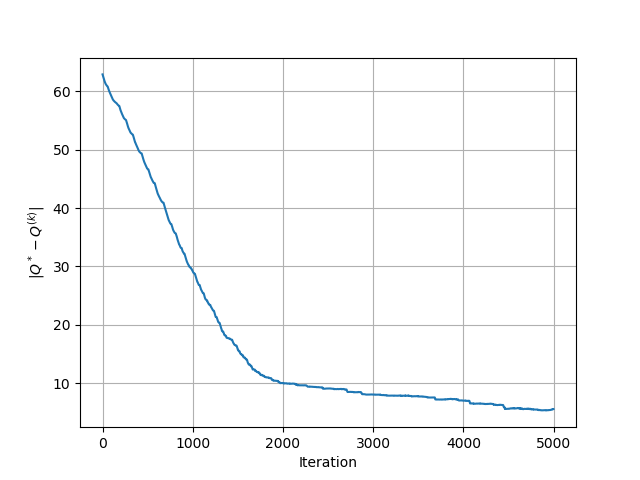

In [5]:
Q4 = np.zeros((nX, nA))

# Slide 15 of lec21.pdf
def Q_learning_update(x_t, a_t, c_t, x_t1, alpha = 0.3):
    return Q4[x_t, a_t] + alpha * (c_t + gamma * np.min(Q4[x_t1]) - Q4[x_t, a_t])

norms4 = simulate(Q4, Q_learning_update)
print(Q4)
plot_norm_Qstar_Q(norms4)

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

[[ 6.12899885  6.03122686  6.30965694  5.24360508]
 [12.35891884 10.67110787 12.27383513 12.75414873]
 [ 7.68165182  8.1741642   6.4364252   8.02131126]
 [ 4.95661639  4.83035943  6.22031573  3.86534759]
 [13.08546129 12.08066224 12.91278095 12.78093587]
 [ 8.50331845  8.41923376  8.12764414  8.45597749]
 [ 3.56649093  2.64435475  3.99857514  3.7943922 ]
 [12.08469976  9.94838207 12.12925582 11.78071517]
 [ 7.26430236  9.25255693  8.50908266  9.05882884]
 [ 4.09983302  4.44184843  3.70245495  2.53900188]
 [12.90661628 12.49078737 10.76982974 12.52418052]
 [ 8.81391097  9.16856843  8.90951986  8.80648089]
 [ 4.12278039  2.64300788  3.41341174  1.38975491]
 [ 0.4032754   0.34194035  1.29394274  0.45711436]
 [ 8.71996746  9.87013009  9.66121875  9.83838931]
 [ 4.05707221  4.14348581  4.50389597  4.21720242]]


<IPython.core.display.Javascript object>


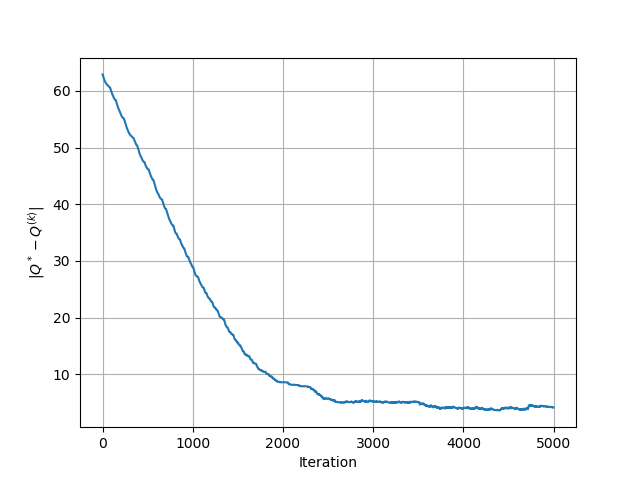

In [6]:
Q5 = np.zeros((nX, nA))

# Slide 32 of lec21.pdf
def SARSA_update(x_t, a_t, c_t, x_t1, a_t1, alpha = 0.3):
    return Q5[x_t, a_t] + alpha * (c_t + gamma * Q5[x_t1, a_t1] - Q5[x_t, a_t])

norms5 = simulate(Q5, SARSA_update, use_a_t1 = True)
print(Q5)
plot_norm_Qstar_Q(norms5)

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

As can be seen from Figure 2, the performance of the Model-based Learning was the best of all the three methods. It reached a difference between the learned Q and the optimal Q (Q*) much faster than the other 2 methods. It only took approximately 800 iterations to start stabilizing.

The second best method, in terms of performance, was SARSA. Even though not much better than Q-learning, it managed to reach an error distance of 10 (double the stabilization error for all 3 methods) in less than 2000 iterations, stabilizing at around 2500 iterations.

Q-learning reached the milestone of an error distance of 10 at 2000 iterations, stabilizing at 4500.

These results could have been expected as SARSA is on-policy, stabilizing quicker; while Q-learning is off-policy, not following the optimal policy it's trying to learn, thus, taking more time.

The Model-based method performed better than the other two (model-free methods) because it learned approximate transition probabilities and cost function for the given problem. Hence, it stabilized faster, with the same error distance.